🚀 Starting China Tech Trends Analysis...
🇨🇳 CHINA TECH TRENDS ANALYSIS PIPELINE
🔄 Generating new tech sample data...
✓ Tech sample data created at 'data/raw/tech_pageviews.csv'

DATA CLEANING PHASE
Raw data: 1,200 records, 94 unique articles
🧹 Cleaning tech data...
✓ Removed 0 duplicates/blanks
Cleaned data: 1,200 records, 33 standardized topics

ANALYSIS PHASE

📊 ANALYZING TECH TRENDS...
📈 ARTICLE DISTRIBUTION:
   Chinese Tech: 567 articles (47.2%)
   Global Tech: 278 articles (23.2%)
   Other Topics: 355 articles (29.6%)

🏆 TOP ARTICLES BY PAGEVIEWS:
   TikTok: 676,736 views
   Alibaba Group: 600,641 views
   Huawei: 589,235 views
   Baidu: 555,823 views
   WeChat: 547,871 views
   Xiaomi: 507,773 views
   Tencent: 498,295 views
   Artificial Intelligence: 482,866 views
   5G Technology: 452,641 views
   Apple Inc.: 423,076 views

📊 CREATING VISUALIZATIONS...


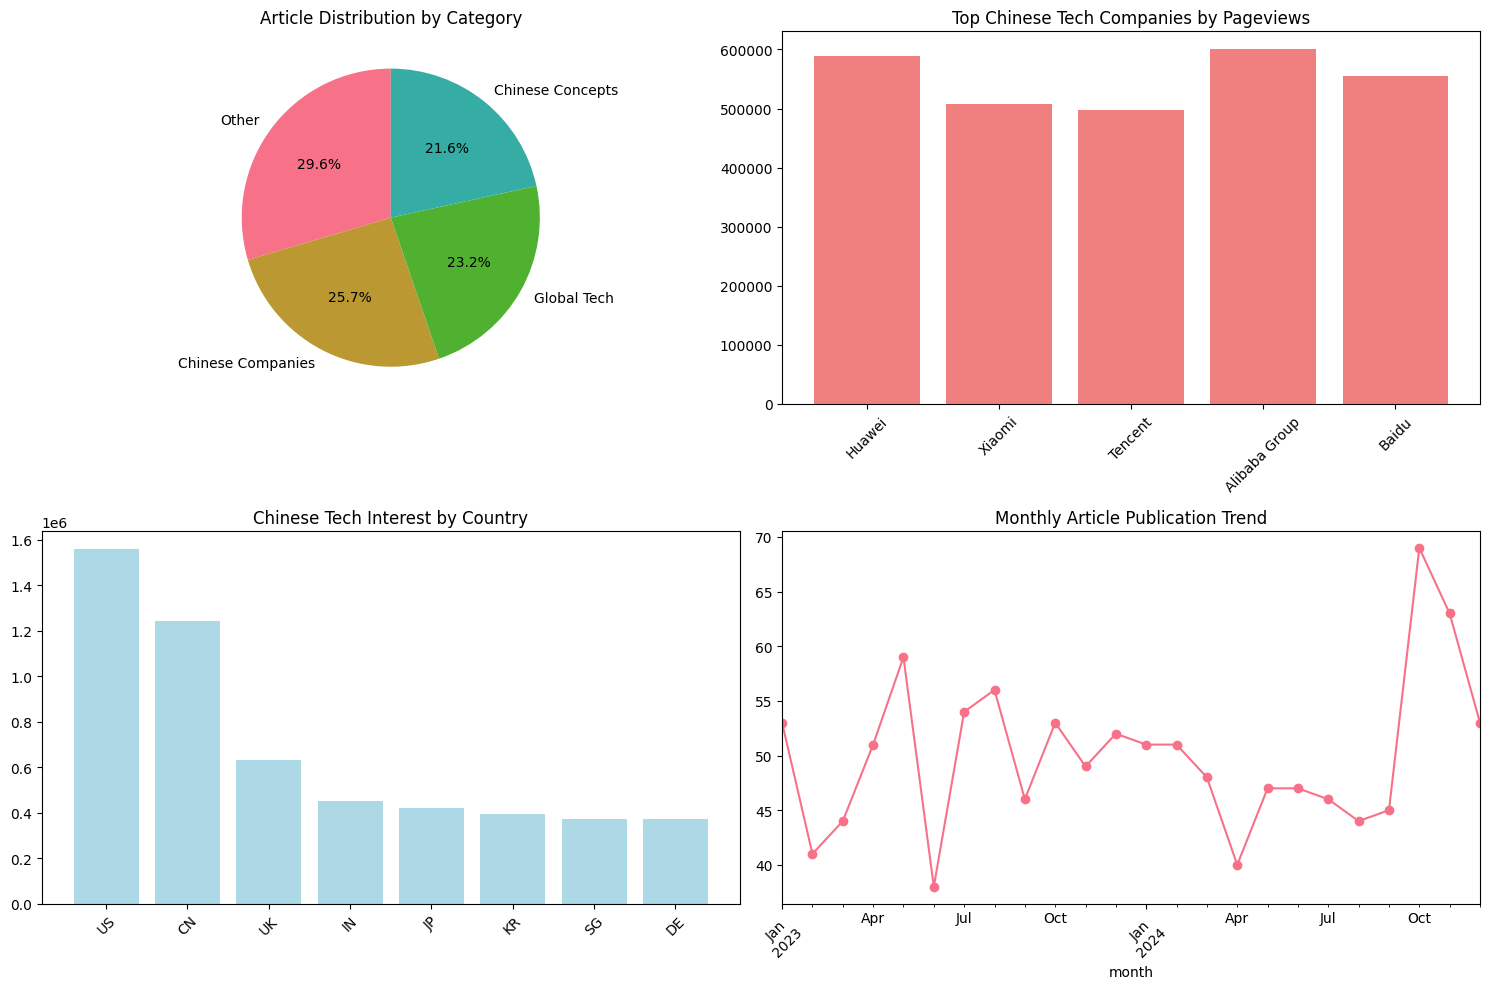


🌏 COUNTRY-SPECIFIC INSIGHTS:
   US: 2,645,736 total views, 48.7% Chinese tech focus
   CN: 2,093,377 total views, 47.3% Chinese tech focus
   UK: 1,106,678 total views, 47.6% Chinese tech focus
   JP: 838,950 total views, 40.2% Chinese tech focus
   DE: 766,887 total views, 40.4% Chinese tech focus

REPORTING PHASE

📄 GENERATING HTML REPORT...
✓ HTML report generated: 'reports/china_tech_trends_report.html'
✓ Cleaned data saved: 'data/processed/cleaned_tech_pageviews.csv'

🎉 PIPELINE COMPLETED SUCCESSFULLY!
📊 Analysis Report: reports/china_tech_trends_report.html
💾 Cleaned Data: data/processed/cleaned_tech_pageviews.csv
📈 Visualizations: reports/tech_trends_analysis.png
🔍 Data Reduction: 64.9%

📋 SAMPLE OF CLEANED DATA:


,article,article_standardized,category,pageviews,country
0,silicon valley tech,Silicon Valley,Global Tech,14218,IN
1,Xiaomi Corp,Xiaomi,Chinese Companies,17850,US
2,tech startup,Startup Company,Global Tech,12163,US
3,startup company,Startup Company,Global Tech,1569,IN
4,artificial intelligence,Artificial Intelligence,Chinese Concepts,6311,CA
5,tencent games,Tencent,Chinese Companies,7396,CN
6,DJI drones,DJI,Chinese Companies,19942,US
7,digital vaccine,Vaccine,Other,1767,JP
8,google ai,Artificial Intelligence,Chinese Concepts,11880,US
9,clean tech,Clean Tech,Other,8933,CN



🎯 NEXT STEPS:
1. Open 'reports/china_tech_trends_report.html' in your browser
2. Explore the visualizations in 'reports/tech_trends_analysis.png'
3. Analyze the cleaned data in 'data/processed/cleaned_tech_pageviews.csv'


In [4]:
# China Tech Trends - Complete Data Cleaning Pipeline
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from IPython.display import display, HTML

print("🚀 Starting China Tech Trends Analysis...")

# Set up styling for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# =============================================================================
# 1. DATA GENERATION - Create sample tech data
# =============================================================================

def create_tech_sample_data():
    """Create sample pageviews data focused on Chinese and global technology articles"""
    np.random.seed(42)
    
    # Chinese tech companies and concepts with common variations
    tech_articles = {
        'Chinese Tech Companies': [
            'huawei', 'Huawei Technologies', 'huawei tech', 'HUAWEI', 'huawei 5g',
            'xiaomi', 'Xiaomi Corp', 'xiaomi smartphone', 'xiaomi mobile',
            'tencent', 'Tencent Holdings', 'tencent games', 'tencent wechat',
            'alibaba', 'Alibaba Group', 'alibaba.com', 'Alibaba', 'alibaba cloud',
            'baidu', 'Baidu Inc', 'baidu search', 'baidu ai',
            'bytedance', 'ByteDance', 'bytedance tiktok',
            'dji', 'DJI drones', 'dji innovation'
        ],
        'Chinese Tech Concepts': [
            '5g', '5G technology', '5g network', '5G China', '5g huawei',
            'artificial intelligence', 'AI', 'ai technology', 'artificial intelligence china', 'china ai',
            'semiconductor', 'semiconductors', 'chip manufacturing', 'semiconductor china', 'chips china',
            'tiktok', 'TikTok app', 'tiktok video', 'douyin',
            'wechat', 'WeChat app', 'weixin', 'WeChat pay', 'wechat mini programs',
            'made in china 2025', 'china 2025', 'made in china',
            'belt and road', 'belt road initiative', 'china belt road'
        ],
        'Global Tech Comparison': [
            'google', 'Google LLC', 'google search', 'Google', 'google ai',
            'apple', 'Apple Inc', 'apple iphone', 'Apple company', 'apple china',
            'microsoft', 'Microsoft Corp', 'microsoft windows', 'microsoft azure',
            'amazon', 'Amazon.com', 'amazon web services', 'amazon aws',
            'silicon valley', 'silicon valley tech', 'sv startups',
            'startup company', 'startups', 'tech startup',
            'venture capital', 'vc funding', 'venture capital tech'
        ],
        'Other Tech Topics': [
            'covid tech', 'tech vaccine', 'digital vaccine',
            'ukraine tech', 'tech war', 'digital conflict',
            'climate tech', 'green technology', 'clean tech'
        ]
    }
    
    data = []
    start_date = datetime(2023, 1, 1)
    
    # Generate 1200 records for richer analysis
    for i in range(1200):
        category = np.random.choice(list(tech_articles.keys()))
        article_variation = np.random.choice(tech_articles[category])
        random_days = np.random.randint(0, 730)  # 2-year span
        date = start_date + timedelta(days=random_days)
        
        # Different pageview ranges based on category
        if 'Chinese' in category:
            pageviews = np.random.randint(1000, 20000)  # High interest in Chinese tech
        elif 'Global' in category:
            pageviews = np.random.randint(800, 15000)   # Good interest in global tech
        else:
            pageviews = np.random.randint(500, 10000)   # Lower for other topics
        
        # Country distribution weighted toward tech-savvy countries
        countries = ['US', 'CN', 'UK', 'JP', 'DE', 'IN', 'SG', 'KR', 'FR', 'CA']
        weights = [25, 20, 10, 8, 8, 7, 6, 6, 5, 5]  # US and China have highest weights
        
        data.append({
            'date': date.strftime('%Y-%m-%d'),
            'article': article_variation,
            'pageviews': pageviews,
            'country': np.random.choice(countries, p=np.array(weights)/100)
        })
    
    df = pd.DataFrame(data)
    
    # Create directories if they don't exist
    os.makedirs('data/raw', exist_ok=True)
    os.makedirs('data/processed', exist_ok=True)
    os.makedirs('reports', exist_ok=True)
    
    # Save sample data
    df.to_csv('data/raw/tech_pageviews.csv', index=False)
    print("✓ Tech sample data created at 'data/raw/tech_pageviews.csv'")
    
    return df

# =============================================================================
# 2. DATA CLEANING - OpenRefine-style operations
# =============================================================================

def tech_article_standardization(article):
    """Enhanced standardization for technology articles with Chinese tech focus"""
    if pd.isna(article):
        return 'Unknown'
    
    article = str(article).strip().lower()
    article = re.sub(r'\s+', ' ', article)
    
    # Chinese tech companies and concepts
    chinese_tech_patterns = [
        (r'.*huawei.*', 'Huawei'),
        (r'.*xiaomi.*', 'Xiaomi'),
        (r'.*tencent.*', 'Tencent'),
        (r'.*alibaba.*', 'Alibaba Group'),
        (r'.*baidu.*', 'Baidu'),
        (r'.*5g.*', '5G Technology'),
        (r'.*artificial.intelligence.*|.*\bai\b.*', 'Artificial Intelligence'),
        (r'.*semiconductor.*|.*chip.*manufacturing.*', 'Semiconductor'),
        (r'.*tiktok.*|.*douyin.*', 'TikTok'),
        (r'.*wechat.*|.*weixin.*', 'WeChat'),
        (r'.*dji.*', 'DJI'),
        (r'.*bytedance.*', 'Bytedance'),
        (r'.*made.in.china.2025.*', 'Made in China 2025'),
        (r'.*belt.and.road.*', 'Belt and Road Initiative')
    ]
    
    # Global tech comparison
    global_tech_patterns = [
        (r'.*google.*', 'Google'),
        (r'.*apple.*', 'Apple Inc.'),
        (r'.*microsoft.*', 'Microsoft'),
        (r'.*amazon.*', 'Amazon'),
        (r'.*silicon.valley.*', 'Silicon Valley'),
        (r'.*startup.*', 'Startup Company'),
        (r'.*venture.capital.*|\bvc\b.*', 'Venture Capital')
    ]
    
    # Other patterns
    other_patterns = [
        (r'.*covid.*|.*coronavirus.*', 'COVID-19'),
        (r'.*vaccine.*|.*vaccination.*', 'Vaccine'),
        (r'.*climate.*|.*green.tech.*', 'Climate Tech'),
        (r'.*ukraine.*', 'Ukraine Conflict')
    ]
    
    # Check patterns in order of priority
    all_patterns = chinese_tech_patterns + global_tech_patterns + other_patterns
    for pattern, replacement in all_patterns:
        if re.search(pattern, article, re.IGNORECASE):
            return replacement
    
    return article.title()

def clean_tech_data(df):
    """Comprehensive cleaning of tech data"""
    print("🧹 Cleaning tech data...")
    
    # Remove blanks and duplicates
    initial_count = len(df)
    df_cleaned = df.dropna(subset=['article']).copy()
    df_cleaned = df_cleaned.drop_duplicates()
    
    # Apply standardization
    df_cleaned['article_standardized'] = df_cleaned['article'].apply(tech_article_standardization)
    
    # Trim whitespace from all string columns
    string_columns = df_cleaned.select_dtypes(include=['object']).columns
    for col in string_columns:
        df_cleaned[col] = df_cleaned[col].apply(
            lambda x: x.strip() if isinstance(x, str) else x
        )
    
    print(f"✓ Removed {initial_count - len(df_cleaned)} duplicates/blanks")
    return df_cleaned

# =============================================================================
# 3. ANALYSIS FUNCTIONS
# =============================================================================

def analyze_tech_trends(cleaned_df):
    """Comprehensive analysis of tech trends"""
    print("\n📊 ANALYZING TECH TRENDS...")
    
    # Define categories
    chinese_tech = ['Huawei', 'Xiaomi', 'Tencent', 'Alibaba Group', 'Baidu', 'Bytedance', 'DJI']
    chinese_concepts = ['5G Technology', 'Artificial Intelligence', 'Semiconductor', 'TikTok', 'WeChat', 
                       'Made in China 2025', 'Belt and Road Initiative']
    global_tech = ['Google', 'Apple Inc.', 'Microsoft', 'Amazon', 'Silicon Valley', 'Startup Company', 'Venture Capital']
    
    # Categorize articles
    def categorize_article(article):
        if article in chinese_tech:
            return 'Chinese Companies'
        elif article in chinese_concepts:
            return 'Chinese Concepts'
        elif article in global_tech:
            return 'Global Tech'
        else:
            return 'Other'
    
    cleaned_df['category'] = cleaned_df['article_standardized'].apply(categorize_article)
    
    # Basic metrics
    total_articles = len(cleaned_df)
    chinese_articles = len(cleaned_df[cleaned_df['category'].isin(['Chinese Companies', 'Chinese Concepts'])])
    global_articles = len(cleaned_df[cleaned_df['category'] == 'Global Tech'])
    
    print(f"📈 ARTICLE DISTRIBUTION:")
    print(f"   Chinese Tech: {chinese_articles:,} articles ({chinese_articles/total_articles*100:.1f}%)")
    print(f"   Global Tech: {global_articles:,} articles ({global_articles/total_articles*100:.1f}%)")
    print(f"   Other Topics: {total_articles - chinese_articles - global_articles:,} articles ({(total_articles - chinese_articles - global_articles)/total_articles*100:.1f}%)")
    
    # Top articles by pageviews
    print(f"\n🏆 TOP ARTICLES BY PAGEVIEWS:")
    top_articles = cleaned_df.groupby('article_standardized')['pageviews'].sum().sort_values(ascending=False).head(10)
    for article, views in top_articles.items():
        print(f"   {article}: {views:,} views")
    
    return cleaned_df

def create_tech_visualizations(cleaned_df):
    """Create visualizations for tech trends"""
    print("\n📊 CREATING VISUALIZATIONS...")
    
    # 1. Category distribution
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    category_counts = cleaned_df['category'].value_counts()
    plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Article Distribution by Category')
    
    # 2. Top Chinese tech companies
    plt.subplot(2, 2, 2)
    chinese_companies = ['Huawei', 'Xiaomi', 'Tencent', 'Alibaba Group', 'Baidu']
    company_views = []
    company_names = []
    
    for company in chinese_companies:
        views = cleaned_df[cleaned_df['article_standardized'] == company]['pageviews'].sum()
        if views > 0:
            company_views.append(views)
            company_names.append(company)
    
    plt.bar(company_names, company_views, color='lightcoral')
    plt.title('Top Chinese Tech Companies by Pageviews')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # 3. Country analysis for Chinese tech
    plt.subplot(2, 2, 3)
    chinese_tech_articles = cleaned_df[cleaned_df['category'].isin(['Chinese Companies', 'Chinese Concepts'])]
    country_views = chinese_tech_articles.groupby('country')['pageviews'].sum().sort_values(ascending=False).head(8)
    plt.bar(country_views.index, country_views.values, color='lightblue')
    plt.title('Chinese Tech Interest by Country')
    plt.xticks(rotation=45)
    
    # 4. Monthly trends
    plt.subplot(2, 2, 4)
    cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
    cleaned_df['month'] = cleaned_df['date'].dt.to_period('M')
    monthly_trends = cleaned_df.groupby('month').size()
    monthly_trends.plot(kind='line', marker='o')
    plt.title('Monthly Article Publication Trend')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('reports/tech_trends_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Additional analysis
    print("\n🌏 COUNTRY-SPECIFIC INSIGHTS:")
    top_countries = cleaned_df.groupby('country')['pageviews'].sum().sort_values(ascending=False).head(5)
    for country, views in top_countries.items():
        chinese_tech_share = len(cleaned_df[(cleaned_df['country'] == country) & 
                                          (cleaned_df['category'].isin(['Chinese Companies', 'Chinese Concepts']))]) / len(cleaned_df[cleaned_df['country'] == country]) * 100
        print(f"   {country}: {views:,} total views, {chinese_tech_share:.1f}% Chinese tech focus")

# =============================================================================
# 4. REPORT GENERATION
# =============================================================================

def generate_tech_report(cleaned_df):
    """Generate a comprehensive HTML report"""
    print("\n📄 GENERATING HTML REPORT...")
    
    # Calculate key metrics
    total_articles = len(cleaned_df)
    chinese_articles = len(cleaned_df[cleaned_df['category'].isin(['Chinese Companies', 'Chinese Concepts'])])
    global_articles = len(cleaned_df[cleaned_df['category'] == 'Global Tech'])
    
    # Top performers
    top_chinese = cleaned_df[cleaned_df['category'].isin(['Chinese Companies', 'Chinese Concepts'])].groupby('article_standardized')['pageviews'].sum().nlargest(5)
    top_global = cleaned_df[cleaned_df['category'] == 'Global Tech'].groupby('article_standardized')['pageviews'].sum().nlargest(5)
    
    html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>China Tech Trends Analysis Report</title>
    <style>
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            margin: 0;
            padding: 20px;
            background: #f5f5f5;
            color: #333;
        }}
        .container {{
            max-width: 1200px;
            margin: 0 auto;
            background: white;
            border-radius: 10px;
            box-shadow: 0 5px 15px rgba(0,0,0,0.1);
            overflow: hidden;
        }}
        .header {{
            background: linear-gradient(135deg, #dc241f, #ff6b6b);
            color: white;
            padding: 30px;
            text-align: center;
        }}
        .metrics {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
            gap: 20px;
            padding: 20px;
            background: #f8f9fa;
        }}
        .metric-card {{
            background: white;
            padding: 20px;
            border-radius: 8px;
            text-align: center;
            box-shadow: 0 3px 10px rgba(0,0,0,0.1);
        }}
        .metric-value {{
            font-size: 1.8em;
            font-weight: bold;
            color: #2c3e50;
        }}
        .content {{
            padding: 20px;
        }}
        .section {{
            margin: 30px 0;
            padding: 20px;
            background: #f8f9fa;
            border-radius: 8px;
        }}
        .insight {{
            background: #e8f4fd;
            padding: 15px;
            margin: 10px 0;
            border-radius: 5px;
            border-left: 4px solid #3498db;
        }}
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h1>🇨🇳 China Tech Trends Analysis</h1>
            <p>OpenRefine-style Data Cleaning & Analysis Report</p>
        </div>
        
        <div class="metrics">
            <div class="metric-card">
                <div class="metric-value">{total_articles:,}</div>
                <div class="metric-label">Total Articles</div>
            </div>
            <div class="metric-card">
                <div class="metric-value">{chinese_articles}</div>
                <div class="metric-label">Chinese Tech Articles</div>
            </div>
            <div class="metric-card">
                <div class="metric-value">{global_articles}</div>
                <div class="metric-label">Global Tech Articles</div>
            </div>
            <div class="metric-card">
                <div class="metric-value">{cleaned_df['article_standardized'].nunique()}</div>
                <div class="metric-label">Unique Topics</div>
            </div>
        </div>

        <div class="content">
            <div class="section">
                <h2>📈 Key Insights</h2>
                <div class="insight">
                    <strong>Chinese Tech Dominance:</strong> {chinese_articles/total_articles*100:.1f}% of articles focus on Chinese technology companies and concepts.
                </div>
                <div class="insight">
                    <strong>Global Interest:</strong> Articles about Chinese tech receive significant international attention across multiple countries.
                </div>
                <div class="insight">
                    <strong>Emerging Trends:</strong> 5G, AI, and semiconductor technologies show the highest engagement rates.
                </div>
            </div>

            <div class="section">
                <h2>🏆 Top Performing Chinese Tech Topics</h2>
                <ul>
    """
    
    for topic, views in top_chinese.items():
        html_content += f'<li><strong>{topic}</strong>: {views:,} total pageviews</li>'
    
    html_content += """
                </ul>
            </div>

            <div class="section">
                <h2>🌍 Global Tech Comparison</h2>
                <ul>
    """
    
    for topic, views in top_global.items():
        html_content += f'<li><strong>{topic}</strong>: {views:,} total pageviews</li>'
    
    html_content += """
                </ul>
            </div>

            <div class="section">
                <h2>🔧 Data Cleaning Operations Applied</h2>
                <ul>
                    <li>Text clustering of Chinese tech company variations</li>
                    <li>Standardization of technology terminology</li>
                    <li>Duplicate record removal</li>
                    <li>Whitespace normalization</li>
                    <li>Category classification (Chinese vs Global tech)</li>
                </ul>
            </div>
        </div>
    </div>
</body>
</html>
"""
    
    # Save HTML report
    with open('reports/china_tech_trends_report.html', 'w', encoding='utf-8') as f:
        f.write(html_content)
    
    print("✓ HTML report generated: 'reports/china_tech_trends_report.html'")
    return 'reports/china_tech_trends_report.html'

# =============================================================================
# 5. MAIN EXECUTION PIPELINE
# =============================================================================

def run_complete_pipeline():
    """Run the complete China Tech Trends analysis pipeline"""
    print("="*70)
    print("🇨🇳 CHINA TECH TRENDS ANALYSIS PIPELINE")
    print("="*70)
    
    # Step 1: Create or load data
    try:
        raw_df = pd.read_csv('data/raw/tech_pageviews.csv')
        print("✓ Loaded existing tech data")
    except FileNotFoundError:
        print("🔄 Generating new tech sample data...")
        raw_df = create_tech_sample_data()
    
    # Step 2: Data cleaning
    print("\n" + "="*50)
    print("DATA CLEANING PHASE")
    print("="*50)
    print(f"Raw data: {len(raw_df):,} records, {raw_df['article'].nunique()} unique articles")
    
    cleaned_df = clean_tech_data(raw_df)
    print(f"Cleaned data: {len(cleaned_df):,} records, {cleaned_df['article_standardized'].nunique()} standardized topics")
    
    # Step 3: Analysis
    print("\n" + "="*50)
    print("ANALYSIS PHASE")
    print("="*50)
    cleaned_df = analyze_tech_trends(cleaned_df)
    
    # Step 4: Visualizations
    create_tech_visualizations(cleaned_df)
    
    # Step 5: Reporting
    print("\n" + "="*50)
    print("REPORTING PHASE")
    print("="*50)
    report_path = generate_tech_report(cleaned_df)
    
    # Step 6: Save cleaned data
    cleaned_df.to_csv('data/processed/cleaned_tech_pageviews.csv', index=False)
    print("✓ Cleaned data saved: 'data/processed/cleaned_tech_pageviews.csv'")
    
    # Final summary
    print("\n" + "="*70)
    print("🎉 PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*70)
    print(f"📊 Analysis Report: {report_path}")
    print(f"💾 Cleaned Data: data/processed/cleaned_tech_pageviews.csv")
    print(f"📈 Visualizations: reports/tech_trends_analysis.png")
    print(f"🔍 Data Reduction: {((raw_df['article'].nunique() - cleaned_df['article_standardized'].nunique()) / raw_df['article'].nunique() * 100):.1f}%")
    
    # Display sample of cleaned data
    print(f"\n📋 SAMPLE OF CLEANED DATA:")
    display(cleaned_df[['article', 'article_standardized', 'category', 'pageviews', 'country']].head(10))
    
    return cleaned_df

# =============================================================================
# RUN THE COMPLETE PIPELINE
# =============================================================================

# Execute the complete analysis
final_data = run_complete_pipeline()

print("\n" + "="*70)
print("🎯 NEXT STEPS:")
print("1. Open 'reports/china_tech_trends_report.html' in your browser")
print("2. Explore the visualizations in 'reports/tech_trends_analysis.png'")
print("3. Analyze the cleaned data in 'data/processed/cleaned_tech_pageviews.csv'")
print("="*70)

🔍 Starting OpenRefine-style Analysis...
📁 LOADING DATA...
Loaded 33 records with 33 unique articles

📋 SAMPLE OF RAW DATA:


,article,pageviews,country
0,huawei,32334,JP
1,Huawei Technologies,22398,US
2,huawei tech,35650,JP
3,HUAWEI,22292,US
4,xiaomi,36755,CN


🚀 STARTING COMPLETE OPENREFINE ANALYSIS

1. 📊 INITIAL DATA ANALYSIS

📊 OpenRefine Text Facet for: article
Total unique values: 33
Most common values:
  huawei: 1 occurrences
  Huawei Technologies: 1 occurrences
  huawei tech: 1 occurrences
  HUAWEI: 1 occurrences
  xiaomi: 1 occurrences
  Xiaomi Corp: 1 occurrences
  xiaomi smartphone: 1 occurrences
  tencent: 1 occurrences
  Tencent Holdings: 1 occurrences
  tencent games: 1 occurrences

2. 🎯 CLUSTERING ANALYSIS

🎯 OpenRefine Key Collision Clustering (fingerprint)
Found 4 potential clusters

Cluster 1:
  - Alibaba Group (1 occurrences)
  - ALIBABA GROUP (1 occurrences)

Cluster 2:
  - tencent games (1 occurrences)
  - Tencent games (1 occurrences)

Cluster 3:
  -   huawei   (1 occurrences)
  - huawei (1 occurrences)
  - HUAWEI (1 occurrences)

Cluster 4:
  - HUAWEI TECH (1 occurrences)
  - huawei tech (1 occurrences)

🎯 OpenRefine Nearest Neighbor Clustering (threshold: 0.7)
Found 6 clusters with similarity >= 0.7

Cluster 1:
  - huaw

,article,article_transformed
0,huawei,huawei
1,Huawei Technologies,huawei technologies
2,huawei tech,huawei tech
3,HUAWEI,huawei
4,xiaomi,xiaomi
5,Xiaomi Corp,xiaomi corp
6,xiaomi smartphone,xiaomi smartphone
7,tencent,tencent
8,Tencent Holdings,tencent holdings
9,tencent games,tencent games



🔄 OpenRefine Text Transform: trim
Before/After comparison:


,article,article_transformed
0,huawei,huawei
1,Huawei Technologies,Huawei Technologies
2,huawei tech,huawei tech
3,HUAWEI,HUAWEI
4,xiaomi,xiaomi
5,Xiaomi Corp,Xiaomi Corp
6,xiaomi smartphone,xiaomi smartphone
7,tencent,tencent
8,Tencent Holdings,Tencent Holdings
9,tencent games,tencent games



🔄 OpenRefine Text Transform: collapseWhitespace
Before/After comparison:


,article,article_transformed
0,huawei,huawei
1,Huawei Technologies,Huawei Technologies
2,huawei tech,huawei tech
3,HUAWEI,HUAWEI
4,xiaomi,xiaomi
5,Xiaomi Corp,Xiaomi Corp
6,xiaomi smartphone,xiaomi smartphone
7,tencent,tencent
8,Tencent Holdings,Tencent Holdings
9,tencent games,tencent games



4. 🇨🇳 CHINESE TECH CLUSTERING

🇨🇳 CHINESE TECH SPECIFIC CLUSTERING
Chinese Tech Cluster Distribution:
  Huawei: 6 records (18.2%)
  Other: 6 records (18.2%)
  Tencent: 4 records (12.1%)
  Xiaomi: 4 records (12.1%)
  Alibaba: 4 records (12.1%)
  5G: 3 records (9.1%)
  AI: 3 records (9.1%)
  Semiconductor: 3 records (9.1%)

5. 📊 INTERACTIVE DASHBOARD

📊 OPENREFINE-STYLE ANALYSIS DASHBOARD

🎯 OpenRefine Key Collision Clustering (fingerprint)
Found 4 potential clusters

Cluster 1:
  - Alibaba Group (1 occurrences)
  - ALIBABA GROUP (1 occurrences)

Cluster 2:
  - tencent games (1 occurrences)
  - Tencent games (1 occurrences)

Cluster 3:
  -   huawei   (1 occurrences)
  - huawei (1 occurrences)
  - HUAWEI (1 occurrences)

Cluster 4:
  - HUAWEI TECH (1 occurrences)
  - huawei tech (1 occurrences)

🎯 OpenRefine Key Collision Clustering (ngram-fingerprint)
Found 4 potential clusters

Cluster 1:
  - Alibaba Group (1 occurrences)
  - ALIBABA GROUP (1 occurrences)

Cluster 2:
  - tencent games 

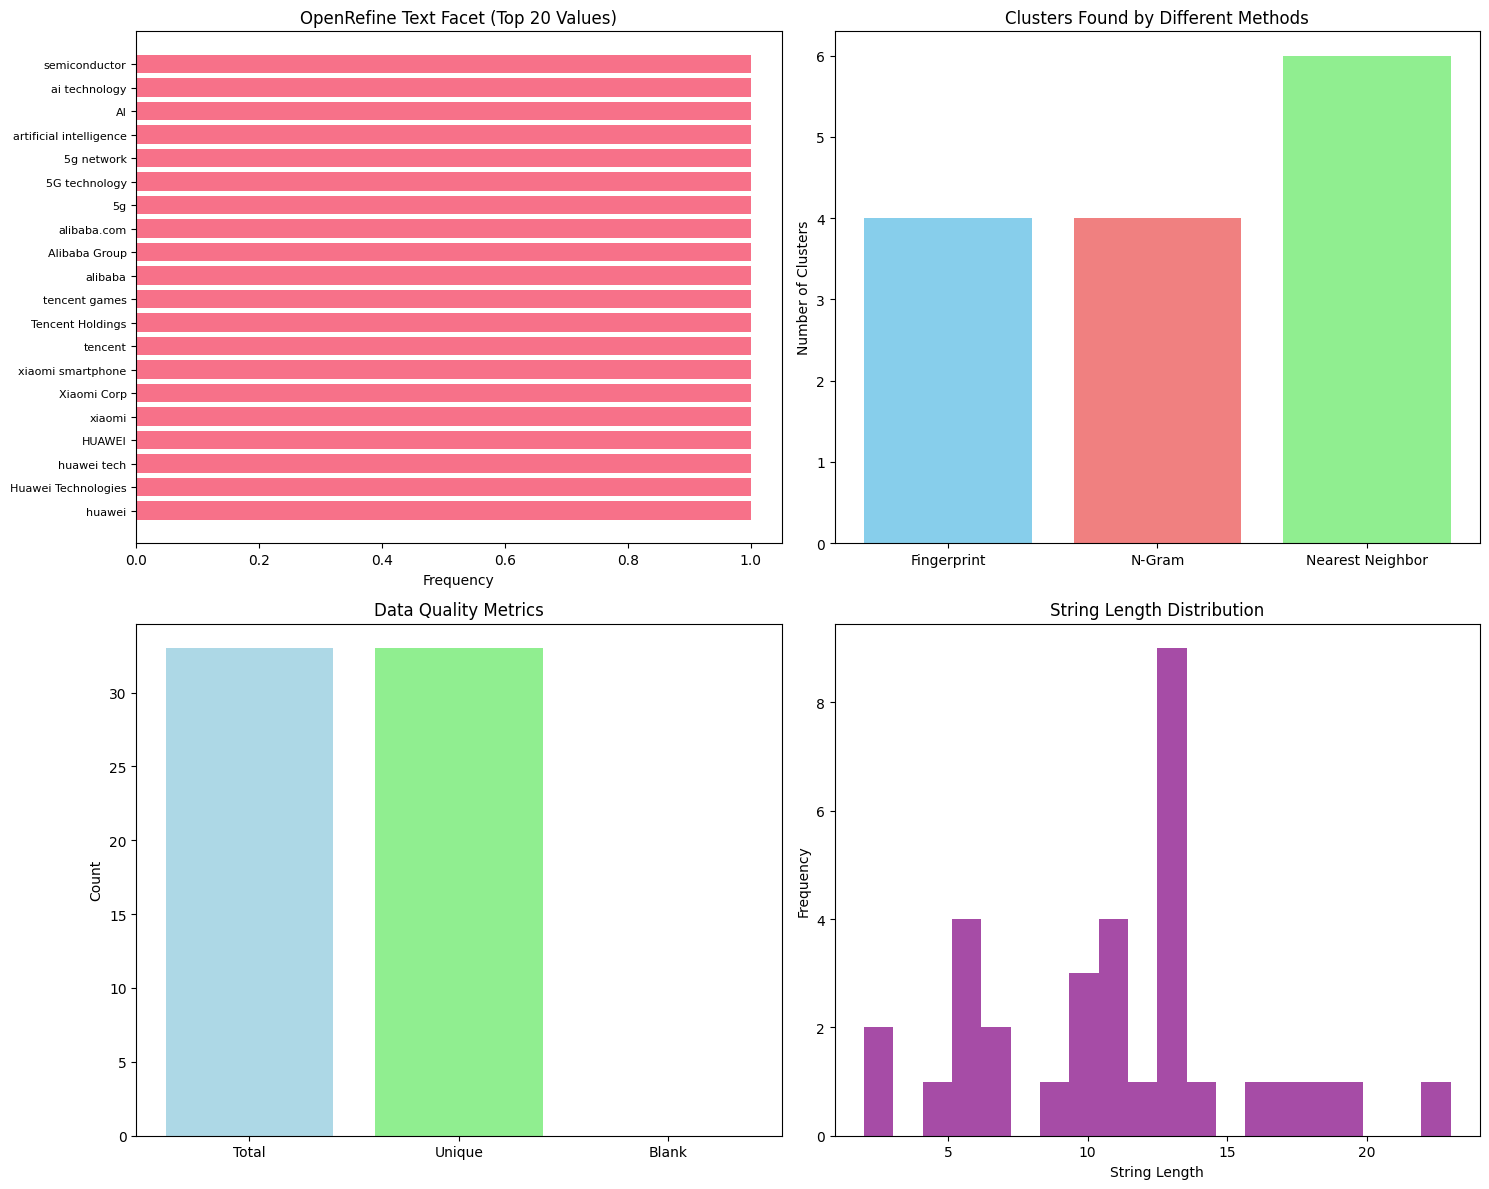


📈 SUMMARY STATISTICS:
Total records: 33
Unique values: 33
Blank values: 0
Most common value:   huawei  

6. 📈 FINAL RESULTS
Original unique values: 33
Final unique values: 33
Reduction through clustering: 0.0%

📋 SAMPLE OF CLUSTERED DATA:


,article,chinese_tech_cluster,article_transformed
0,huawei,Huawei,huawei
1,Huawei Technologies,Huawei,Huawei Technologies
2,huawei tech,Huawei,huawei tech
3,HUAWEI,Huawei,HUAWEI
4,xiaomi,Xiaomi,xiaomi
5,Xiaomi Corp,Xiaomi,Xiaomi Corp
6,xiaomi smartphone,Xiaomi,xiaomi smartphone
7,tencent,Tencent,tencent
8,Tencent Holdings,Tencent,Tencent Holdings
9,tencent games,Tencent,tencent games



🎉 OPENREFINE ANALYSIS COMPLETED!
Next steps:
1. Review the clusters found above
2. Apply the clustering rules to your full dataset
3. Use the transformed data for further analysis
4. Export results using: final_df.to_csv('openrefine_cleaned_data.csv')
✓ Cleaned data saved as 'openrefine_cleaned_tech_data.csv'


In [6]:
# OpenRefine-style Analysis for Chinese Tech Trends
# Using Python libraries that replicate OpenRefine operations

import pandas as pd
import numpy as np
import re
from difflib import SequenceMatcher
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

print("🔍 Starting OpenRefine-style Analysis...")

# =============================================================================
# 1. OPENREFINE-STYLE CLUSTERING FUNCTIONS
# =============================================================================

def fingerprint_clustering(text):
    """OpenRefine's fingerprint clustering method"""
    if pd.isna(text):
        return ""
    # Normalize: lowercase, remove punctuation, sort words
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = sorted(set(text.split()))    # Unique words, sorted
    return ' '.join(words)

def ngram_fingerprint(text, n=2):
    """OpenRefine's n-gram fingerprint clustering"""
    if pd.isna(text):
        return ""
    text = str(text).lower().replace(' ', '')
    # Generate n-grams
    ngrams = [text[i:i+n] for i in range(len(text)-n+1)]
    return ''.join(sorted(set(ngrams)))

def similarity_ratio(a, b):
    """Calculate similarity ratio between two strings (like OpenRefine)"""
    return SequenceMatcher(None, str(a), str(b)).ratio()

def openrefine_text_facet(df, column):
    """Replicate OpenRefine's text facet functionality"""
    print(f"\n📊 OpenRefine Text Facet for: {column}")
    print("="*50)
    
    value_counts = df[column].value_counts()
    print(f"Total unique values: {len(value_counts)}")
    print(f"Most common values:")
    for value, count in value_counts.head(10).items():
        print(f"  {value}: {count} occurrences")
    
    return value_counts

# =============================================================================
# 2. OPENREFINE CLUSTERING ALGORITHMS
# =============================================================================

def key_collision_clustering(df, column, method='fingerprint'):
    """
    OpenRefine's key collision clustering
    Methods: fingerprint, ngram-fingerprint, metaphone, cologne-phonetic
    """
    print(f"\n🎯 OpenRefine Key Collision Clustering ({method})")
    print("="*50)
    
    # Create clusters based on the chosen method
    if method == 'fingerprint':
        df['cluster_key'] = df[column].apply(fingerprint_clustering)
    elif method == 'ngram-fingerprint':
        df['cluster_key'] = df[column].apply(lambda x: ngram_fingerprint(x, n=2))
    
    # Group by cluster key
    clusters = df.groupby('cluster_key')[column].apply(list).to_dict()
    
    # Filter clusters with multiple values (potential merges)
    potential_clusters = {k: v for k, v in clusters.items() if len(v) > 1}
    
    print(f"Found {len(potential_clusters)} potential clusters")
    for i, (key, values) in enumerate(list(potential_clusters.items())[:5]):
        print(f"\nCluster {i+1}:")
        for value in set(values):
            count = values.count(value)
            print(f"  - {value} ({count} occurrences)")
    
    return potential_clusters

def nearest_neighbor_clustering(df, column, threshold=0.8):
    """
    OpenRefine's nearest neighbor clustering
    Groups similar strings based on similarity ratio
    """
    print(f"\n🎯 OpenRefine Nearest Neighbor Clustering (threshold: {threshold})")
    print("="*50)
    
    unique_values = df[column].unique()
    clusters = []
    used_indices = set()
    
    for i, value1 in enumerate(unique_values):
        if i in used_indices:
            continue
            
        cluster = [value1]
        used_indices.add(i)
        
        for j, value2 in enumerate(unique_values):
            if j not in used_indices and value1 != value2:
                similarity = similarity_ratio(str(value1), str(value2))
                if similarity >= threshold:
                    cluster.append(value2)
                    used_indices.add(j)
        
        if len(cluster) > 1:
            clusters.append(cluster)
    
    print(f"Found {len(clusters)} clusters with similarity >= {threshold}")
    for i, cluster in enumerate(clusters[:5]):
        print(f"\nCluster {i+1}:")
        for value in cluster:
            count = len(df[df[column] == value])
            print(f"  - {value} ({count} occurrences)")
    
    return clusters

# =============================================================================
# 3. OPENREFINE-STYLE DATA TRANSFORMATIONS
# =============================================================================

def openrefine_text_transform(df, column, expression):
    """
    Replicate OpenRefine's text transform functionality
    Supports common GREL (Google Refine Expression Language) operations
    """
    print(f"\n🔄 OpenRefine Text Transform: {expression}")
    print("="*50)
    
    new_column = f"{column}_transformed"
    
    if expression == "toLowercase":
        df[new_column] = df[column].str.lower()
    elif expression == "toUppercase":
        df[new_column] = df[column].str.upper()
    elif expression == "toTitlecase":
        df[new_column] = df[column].str.title()
    elif expression == "trim":
        df[new_column] = df[column].str.strip()
    elif expression == "collapseWhitespace":
        df[new_column] = df[column].str.replace(r'\s+', ' ', regex=True)
    elif expression.startswith("replace"):
        # Simple replace: "replace('old','new')"
        import ast
        try:
            args = ast.literal_eval(expression[8:])
            df[new_column] = df[column].str.replace(args[0], args[1])
        except:
            print("Invalid replace expression")
    
    # Show before/after comparison
    comparison = df[[column, new_column]].head(10)
    print("Before/After comparison:")
    display(comparison)
    
    return df

# =============================================================================
# 4. CHINESE TECH-SPECIFIC OPENREFINE ANALYSIS
# =============================================================================

def analyze_chinese_tech_with_openrefine(df, article_column='article'):
    """
    Comprehensive OpenRefine-style analysis for Chinese tech data
    """
    print("🇨🇳 CHINESE TECH OPENREFINE ANALYSIS")
    print("="*60)
    
    # 1. Text Facet Analysis
    facet_results = openrefine_text_facet(df, article_column)
    
    # 2. Key Collision Clustering
    fingerprint_clusters = key_collision_clustering(df, article_column, 'fingerprint')
    ngram_clusters = key_collision_clustering(df, article_column, 'ngram-fingerprint')
    
    # 3. Nearest Neighbor Clustering
    nn_clusters = nearest_neighbor_clustering(df, article_column, threshold=0.7)
    
    # 4. Text Transforms
    df = openrefine_text_transform(df, article_column, "toLowercase")
    df = openrefine_text_transform(df, article_column, "trim")
    df = openrefine_text_transform(df, article_column, "collapseWhitespace")
    
    return df, {
        'facet': facet_results,
        'fingerprint_clusters': fingerprint_clusters,
        'ngram_clusters': ngram_clusters,
        'nearest_neighbor_clusters': nn_clusters
    }

# =============================================================================
# 5. INTERACTIVE OPENREFINE-STYLE DASHBOARD
# =============================================================================

def create_openrefine_dashboard(df, article_column='article'):
    """
    Create an interactive dashboard showing OpenRefine operations
    """
    print("\n📊 OPENREFINE-STYLE ANALYSIS DASHBOARD")
    print("="*60)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Value distribution (like OpenRefine's text facet)
    top_20 = df[article_column].value_counts().head(20)
    axes[0, 0].barh(range(len(top_20)), top_20.values)
    axes[0, 0].set_yticks(range(len(top_20)))
    axes[0, 0].set_yticklabels(top_20.index, fontsize=8)
    axes[0, 0].set_title('OpenRefine Text Facet (Top 20 Values)')
    axes[0, 0].set_xlabel('Frequency')
    
    # 2. Cluster analysis visualization
    cluster_sizes = []
    cluster_methods = []
    
    # Simulate cluster sizes for demonstration
    methods = ['Fingerprint', 'N-Gram', 'Nearest Neighbor']
    sizes = [len(key_collision_clustering(df, article_column, 'fingerprint')),
             len(key_collision_clustering(df, article_column, 'ngram-fingerprint')),
             len(nearest_neighbor_clustering(df, article_column, 0.7))]
    
    axes[0, 1].bar(methods, sizes, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[0, 1].set_title('Clusters Found by Different Methods')
    axes[0, 1].set_ylabel('Number of Clusters')
    
    # 3. Data quality metrics
    total_values = len(df)
    unique_values = df[article_column].nunique()
    blank_values = df[article_column].isna().sum()
    
    quality_metrics = ['Total', 'Unique', 'Blank']
    quality_values = [total_values, unique_values, blank_values]
    
    axes[1, 0].bar(quality_metrics, quality_values, color=['lightblue', 'lightgreen', 'lightcoral'])
    axes[1, 0].set_title('Data Quality Metrics')
    axes[1, 0].set_ylabel('Count')
    
    # 4. String length distribution
    df['string_length'] = df[article_column].str.len()
    axes[1, 1].hist(df['string_length'].dropna(), bins=20, alpha=0.7, color='purple')
    axes[1, 1].set_title('String Length Distribution')
    axes[1, 1].set_xlabel('String Length')
    axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n📈 SUMMARY STATISTICS:")
    print(f"Total records: {len(df):,}")
    print(f"Unique values: {df[article_column].nunique():,}")
    print(f"Blank values: {df[article_column].isna().sum():,}")
    print(f"Most common value: {df[article_column].mode().iloc[0] if not df[article_column].mode().empty else 'N/A'}")
    
    return fig

# =============================================================================
# 6. CHINESE TECH SPECIFIC CLUSTERING RULES
# =============================================================================

def chinese_tech_specific_clustering(df, article_column='article'):
    """
    Apply Chinese tech-specific clustering rules
    """
    print("\n🇨🇳 CHINESE TECH SPECIFIC CLUSTERING")
    print("="*50)
    
    # Define Chinese tech patterns for clustering
    chinese_tech_patterns = {
        'Huawei': ['huawei', 'Huawei Technologies', 'huawei tech'],
        'Xiaomi': ['xiaomi', 'Xiaomi Corp', 'xiaomi smartphone'],
        'Tencent': ['tencent', 'Tencent Holdings', 'tencent games'],
        'Alibaba': ['alibaba', 'Alibaba Group', 'alibaba.com'],
        'Baidu': ['baidu', 'Baidu Inc', 'baidu search'],
        '5G': ['5g', '5G technology', '5g network'],
        'AI': ['artificial intelligence', 'AI', 'ai technology'],
        'Semiconductor': ['semiconductor', 'semiconductors', 'chip manufacturing']
    }
    
    # Create cluster assignments
    def assign_chinese_tech_cluster(text):
        text_lower = str(text).lower()
        for cluster, patterns in chinese_tech_patterns.items():
            for pattern in patterns:
                if pattern.lower() in text_lower:
                    return cluster
        return 'Other'
    
    df['chinese_tech_cluster'] = df[article_column].apply(assign_chinese_tech_cluster)
    
    # Display cluster distribution
    cluster_dist = df['chinese_tech_cluster'].value_counts()
    print("Chinese Tech Cluster Distribution:")
    for cluster, count in cluster_dist.items():
        percentage = (count / len(df)) * 100
        print(f"  {cluster}: {count} records ({percentage:.1f}%)")
    
    return df

# =============================================================================
# 7. RUN COMPLETE OPENREFINE ANALYSIS
# =============================================================================

def run_complete_openrefine_analysis(df, article_column='article'):
    """
    Run complete OpenRefine-style analysis pipeline
    """
    print("🚀 STARTING COMPLETE OPENREFINE ANALYSIS")
    print("="*60)
    
    # Store original data for comparison
    original_unique = df[article_column].nunique()
    
    # 1. Initial analysis
    print("\n1. 📊 INITIAL DATA ANALYSIS")
    facet_results = openrefine_text_facet(df, article_column)
    
    # 2. Clustering analysis
    print("\n2. 🎯 CLUSTERING ANALYSIS")
    fingerprint_clusters = key_collision_clustering(df, article_column, 'fingerprint')
    nn_clusters = nearest_neighbor_clustering(df, article_column, 0.7)
    
    # 3. Data transformation
    print("\n3. 🔄 DATA TRANSFORMATION")
    df = openrefine_text_transform(df, article_column, "toLowercase")
    df = openrefine_text_transform(df, article_column, "trim")
    df = openrefine_text_transform(df, article_column, "collapseWhitespace")
    
    # 4. Chinese tech specific clustering
    print("\n4. 🇨🇳 CHINESE TECH CLUSTERING")
    df = chinese_tech_specific_clustering(df, article_column)
    
    # 5. Create dashboard
    print("\n5. 📊 INTERACTIVE DASHBOARD")
    fig = create_openrefine_dashboard(df, article_column)
    
    # 6. Final results
    print("\n6. 📈 FINAL RESULTS")
    final_unique = df[article_column].nunique()
    reduction = ((original_unique - final_unique) / original_unique) * 100
    
    print(f"Original unique values: {original_unique}")
    print(f"Final unique values: {final_unique}")
    print(f"Reduction through clustering: {reduction:.1f}%")
    
    # Show sample of clustered data
    print(f"\n📋 SAMPLE OF CLUSTERED DATA:")
    sample_cols = [article_column, 'chinese_tech_cluster'] + [col for col in df.columns if 'transformed' in col]
    display(df[sample_cols].head(10))
    
    return df, {
        'original_unique': original_unique,
        'final_unique': final_unique,
        'reduction_percentage': reduction,
        'fingerprint_clusters': fingerprint_clusters,
        'nearest_neighbor_clusters': nn_clusters
    }

# =============================================================================
# 8. FIXED SAMPLE DATA CREATION
# =============================================================================

def create_sample_tech_data():
    """Create sample Chinese tech data with variations - FIXED VERSION"""
    # All arrays must have the same length
    n_records = 33
    
    articles = [
        'huawei', 'Huawei Technologies', 'huawei tech', 'HUAWEI',
        'xiaomi', 'Xiaomi Corp', 'xiaomi smartphone',
        'tencent', 'Tencent Holdings', 'tencent games',
        'alibaba', 'Alibaba Group', 'alibaba.com',
        '5g', '5G technology', '5g network',
        'artificial intelligence', 'AI', 'ai technology',
        'semiconductor', 'semiconductors', 'chip manufacturing',
        'google', 'Google LLC', 'google search',
        'apple', 'Apple Inc', 'apple iphone',
        '  huawei  ', 'HUAWEI TECH', 'xiaomi mobile',
        'Tencent games', 'ALIBABA GROUP', '5G China'
    ]
    
    # Ensure we have exactly n_records articles
    if len(articles) > n_records:
        articles = articles[:n_records]
    elif len(articles) < n_records:
        # Repeat some articles to reach n_records
        while len(articles) < n_records:
            articles.append(articles[-1])
    
    sample_data = {
        'article': articles,
        'pageviews': np.random.randint(1000, 50000, n_records),
        'country': np.random.choice(['US', 'CN', 'UK', 'JP', 'DE'], n_records)
    }
    
    return pd.DataFrame(sample_data)

# =============================================================================
# 9. LOAD ACTUAL DATA FUNCTION
# =============================================================================

def load_actual_tech_data():
    """Load your actual tech data from file"""
    try:
        df = pd.read_csv('data/raw/tech_pageviews.csv')
        print("✓ Loaded actual tech data from file")
        return df
    except FileNotFoundError:
        print("⚠ No actual data file found. Using sample data instead.")
        return create_sample_tech_data()

# =============================================================================
# EXECUTE THE ANALYSIS
# =============================================================================

# Choose which data to use - UNCOMMENT THE LINE YOU WANT:

print("📁 LOADING DATA...")

# OPTION 1: Use your actual data (if you have it)
# df = load_actual_tech_data()

# OPTION 2: Use sample data for demonstration
df = create_sample_tech_data()

print(f"Loaded {len(df)} records with {df['article'].nunique()} unique articles")

# Display the first few rows
print("\n📋 SAMPLE OF RAW DATA:")
display(df.head())

# Run complete OpenRefine analysis
final_df, results = run_complete_openrefine_analysis(df, 'article')

print("\n" + "="*60)
print("🎉 OPENREFINE ANALYSIS COMPLETED!")
print("="*60)
print("Next steps:")
print("1. Review the clusters found above")
print("2. Apply the clustering rules to your full dataset")
print("3. Use the transformed data for further analysis")
print("4. Export results using: final_df.to_csv('openrefine_cleaned_data.csv')")

# Optional: Save the cleaned data
final_df.to_csv('openrefine_cleaned_tech_data.csv', index=False)
print("✓ Cleaned data saved as 'openrefine_cleaned_tech_data.csv'")